In [18]:
# Import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Adjust pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation

#import data for assignment
df = pd.read_csv('/Users/joezhou/Downloads/bank-additional-full.csv',sep=";")

In [19]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# View the data
df.head().T
# the output is aligned to the variable list provided in the assingnment file "bank-additional_names.txt"

0            1            2            3            4
age                      56           57           37           40           56
job               housemaid     services     services       admin.     services
marital             married      married      married      married      married
education          basic.4y  high.school  high.school     basic.6y  high.school
default                  no      unknown           no           no           no
housing                  no           no          yes           no           no
loan                     no           no           no           no          yes
contact           telephone    telephone    telephone    telephone    telephone
month                   may          may          may          may          may
day_of_week             mon          mon          mon          mon          mon
duration                261          149          226          151          307
campaign                  1            1            1            1            1
pdays                   999          999          999          999          999
previous                  0            0            0            0            0
poutcome        nonexistent  nonexistent  nonexistent  nonexistent  nonexistent
emp.var.rate            1.1          1.1          1.1          1.1          1.1
cons.price.idx       93.994       93.994       93.994       93.994       93.994
cons.conf.idx         -36.4        -36.4        -36.4        -36.4        -36.4
euribor3m             4.857        4.857        4.857        4.857        4.857
nr.employed          5191.0       5191.0       5191.0       5191.0       5191.0
y                        no           no           no           no           no

In [20]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# What challenges can you identify in this dataset?
df.info()

#This is used to understand the data types, later we will convert interger to float as this allows for more precise calculations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

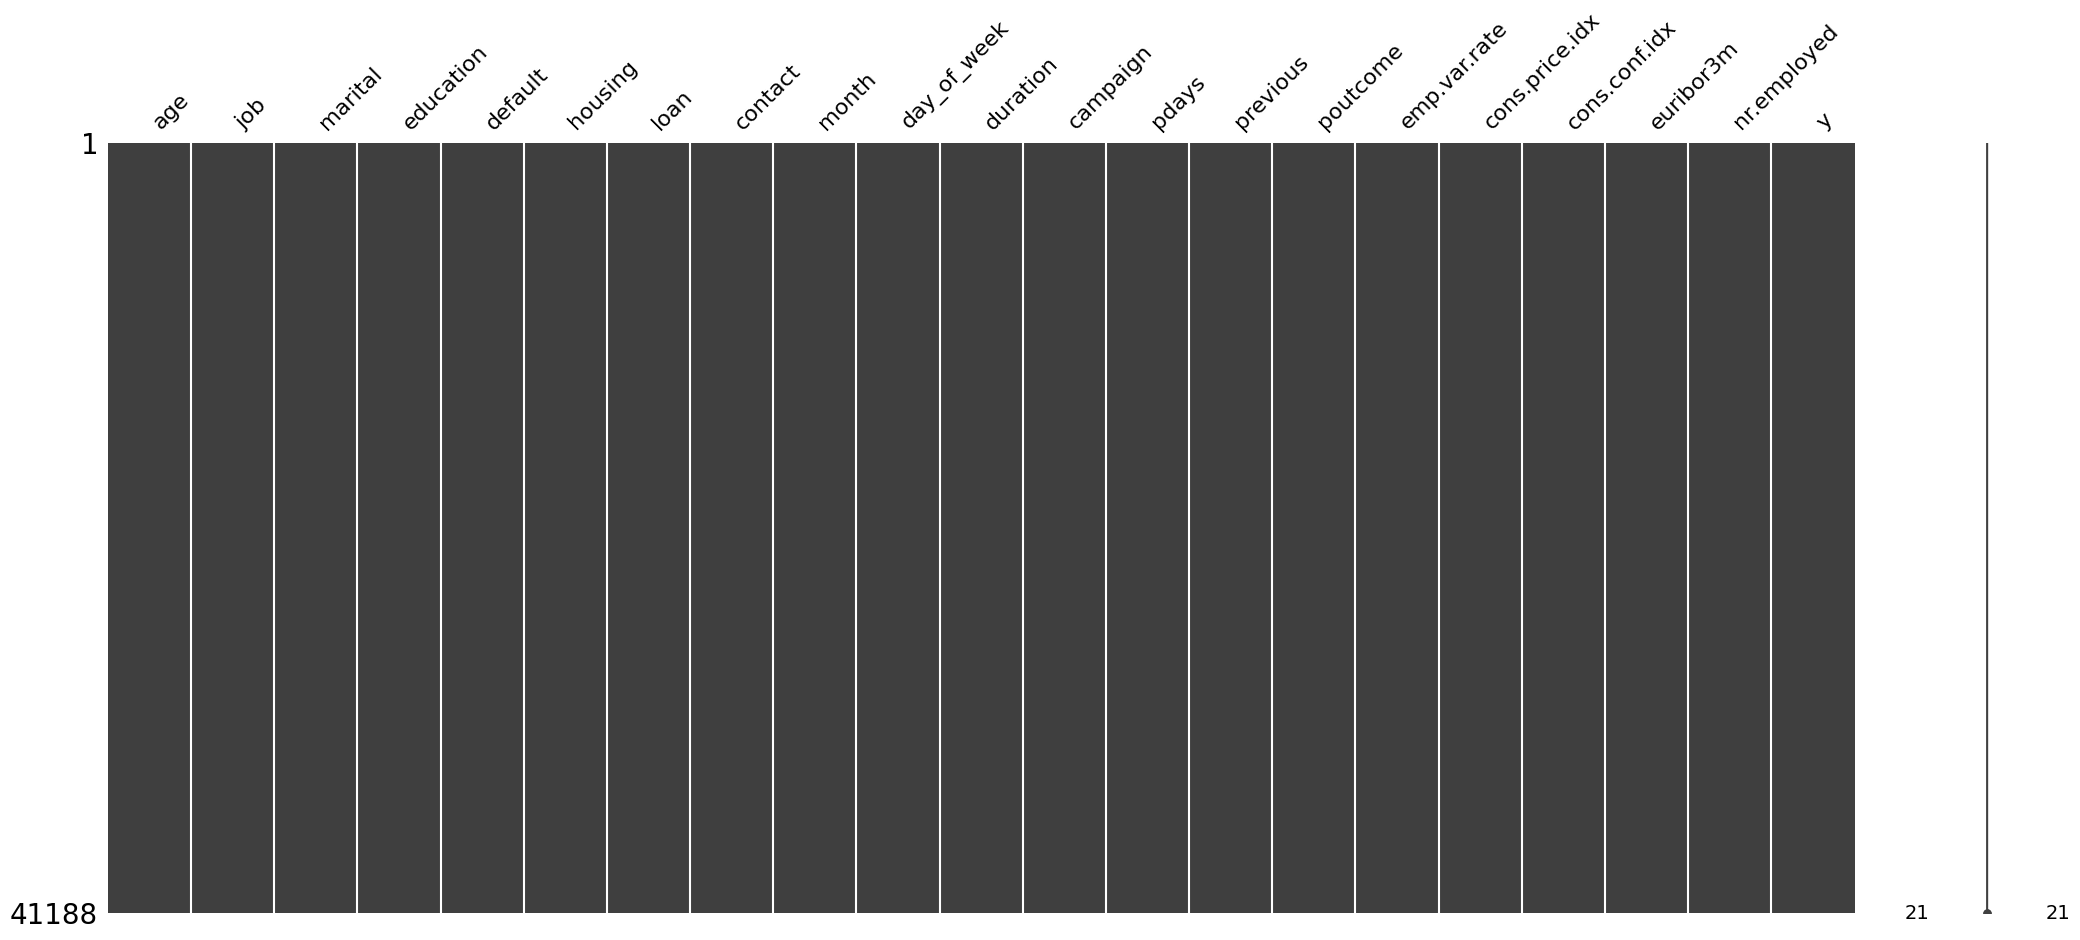

In [21]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

#Exploring missingness

# count the number of missing records
df.isna().sum()

# pip install missingno

import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# Visualise the missingness pattern

# msno.matrix(df): This is a missingness matrix and it provides a quick visual summary of the completeness of the dataset. 
# Each column corresponds to a variable in your dataset and each row corresponds to an observation.  The white lines indicate missing values. 
# If the white lines are randomly distributed, it suggests that data are Missing Completely at Random (MCAR). 
# If there are systematic patterns to the white lines, it suggests the data are either Missing at Random (MAR) or Missing Not at Random (MNAR).

msno.matrix(df)
plt.show()

# msno.heatmap(df): This generates a heatmap indicating the correlation of missingness between every two columns. 
# A correlation value near -1 means if one variable appears then the other variable is very likely to be missing. 
# A correlation value near 0 indicates no dependency and a correlation near 1 indicates a strong positive dependency.

# msno.heatmap(df)
# plt.show()

# msno.dendrogram(df): This creates a dendrogram (tree diagram) to show the hierarchical relationship of missingness between the variables. 
# The dendrogram uses a hierarchical clustering algorithm (which measures distance between clusters) to bin variables against one another by their nullity correlation (measured in terms of binary distance). 
# At each step of the clustering process, the two clusters that are most similar are combined into a single new cluster. 
# The height of each node in the dendrogram indicates the distance between clusters, with greater heights indicating larger distances. 
# In the context of missing data, this can help identify variables that tend to have missing or non-missing values under similar conditions.

# msno.dendrogram(df)
# plt.show()

In [22]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# Calculate basic statistical measures such as mean, median, mode, and percentiles for each attribute. 
# basic statistics
df.describe().round(1).applymap(lambda x: f'{x:,.1f}').transpose()



/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_33508/3870469276.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().round(1).applymap(lambda x: f'{x:,.1f}').transpose()


count     mean    std      min      25%      50%      75%      max
age             41,188.0     40.0   10.4     17.0     32.0     38.0     47.0     98.0
duration        41,188.0    258.3  259.3      0.0    102.0    180.0    319.0  4,918.0
campaign        41,188.0      2.6    2.8      1.0      1.0      2.0      3.0     56.0
pdays           41,188.0    962.5  186.9      0.0    999.0    999.0    999.0    999.0
previous        41,188.0      0.2    0.5      0.0      0.0      0.0      0.0      7.0
emp.var.rate    41,188.0      0.1    1.6     -3.4     -1.8      1.1      1.4      1.4
cons.price.idx  41,188.0     93.6    0.6     92.2     93.1     93.7     94.0     94.8
cons.conf.idx   41,188.0    -40.5    4.6    -50.8    -42.7    -41.8    -36.4    -26.9
euribor3m       41,188.0      3.6    1.7      0.6      1.3      4.9      5.0      5.0
nr.employed     41,188.0  5,167.0   72.3  4,963.6  5,099.1  5,191.0  5,228.1  5,228.1

In [23]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# Markdowns for variable definitions

# variable --> definition --> notes on transformation for EDA


# age	            --> customer age in years               --> check for outlier and potential bucketing + encoding
# job	            --> Type of employment                  --> encode, likely not useful becuase these variables are not often updated
# marital	        --> Matrital status                     --> this variable should not be used from a privacy and bias perspective 
# education	        --> Level of education                  --> encode
# default	        --> Credit default                      --> encode to categorise on previous credit defaults
# housing	        --> Flag for having home loan           --> encode
# loan	            --> Flag for having Personal loan       --> encode
# contact	        --> Contact method                      --> encode, this might not be useful due to diverse nature of banking interactions
# month	            --> Last month of contact               --> change variable to number of month since last contact
# day_of_week	    --> Last contact day of week            --> encode, and create feature for weekend vs weekday. note this is not possible as all contact occured during week days
# duration	        --> last contact duration, in seconds (numeric). Note: this is symptom of the predictive variable --> remove from predictive model due to self fullfilling nature
# campaign	        --> Number of contact during the campaign, this includes last contact  --> this might correlate with 'previous' variable
# pdays	            --> Number of days since last contact       --> create grouping for contact vs non contact. 
# previous	        --> Number of contacts before this compagne -->
# poutcome	        --> Outcome of previous marketing campaign (failure, non exist, success) --> encode, would be interesting to see the conditional probability in relation to latest campaign
# y	                --> Subscribed to term deposit (Yes, No)                --> predictive variable


# emp.var.rate	    --> Social economic - employment variation rate (QTR)
# cons.price.idx	--> Social economic - CPI (monthly)
# cons.conf.idx	    --> Social economic - consumer confidence (monthly)
# euribor3m	        --> Social economic - 3 month rate (daily)
# nr.employed	    --> Number of employees (quarterly)



In [24]:
print('marital:',df['marital'].unique())
print('education:',df['education'].unique())
print('contact:',df['contact'].unique())


marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
contact: ['telephone' 'cellular']


In [25]:
# 2. Data collection and preparation: Collect and prepare the necessary data for analysis. 

# Feature Engineering based on the data preparation observations above

# Convert all integer columns to float
df[df.select_dtypes(include='int').columns] = df.select_dtypes(include='int').astype(float)

#Create groups for some variables before encoding layer



# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 
                                                'contact', 'month', 'day_of_week','poutcome','y'], drop_first=False)


# Identify and convert boolean columns to integers
bool_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)


In [26]:
# Set pandas options to display all columns
pd.set_option('display.max_rows', None)

print(df_encoded.head().T)

                                      0         1         2         3         4
age                              56.000    57.000    37.000    40.000    56.000
duration                        261.000   149.000   226.000   151.000   307.000
campaign                          1.000     1.000     1.000     1.000     1.000
pdays                           999.000   999.000   999.000   999.000   999.000
previous                          0.000     0.000     0.000     0.000     0.000
emp.var.rate                      1.100     1.100     1.100     1.100     1.100
cons.price.idx                   93.994    93.994    93.994    93.994    93.994
cons.conf.idx                   -36.400   -36.400   -36.400   -36.400   -36.400
euribor3m                         4.857     4.857     4.857     4.857     4.857
nr.employed                    5191.000  5191.000  5191.000  5191.000  5191.000
job_admin.                        0.000     0.000     0.000     1.000     0.000
job_blue-collar                   0.000 

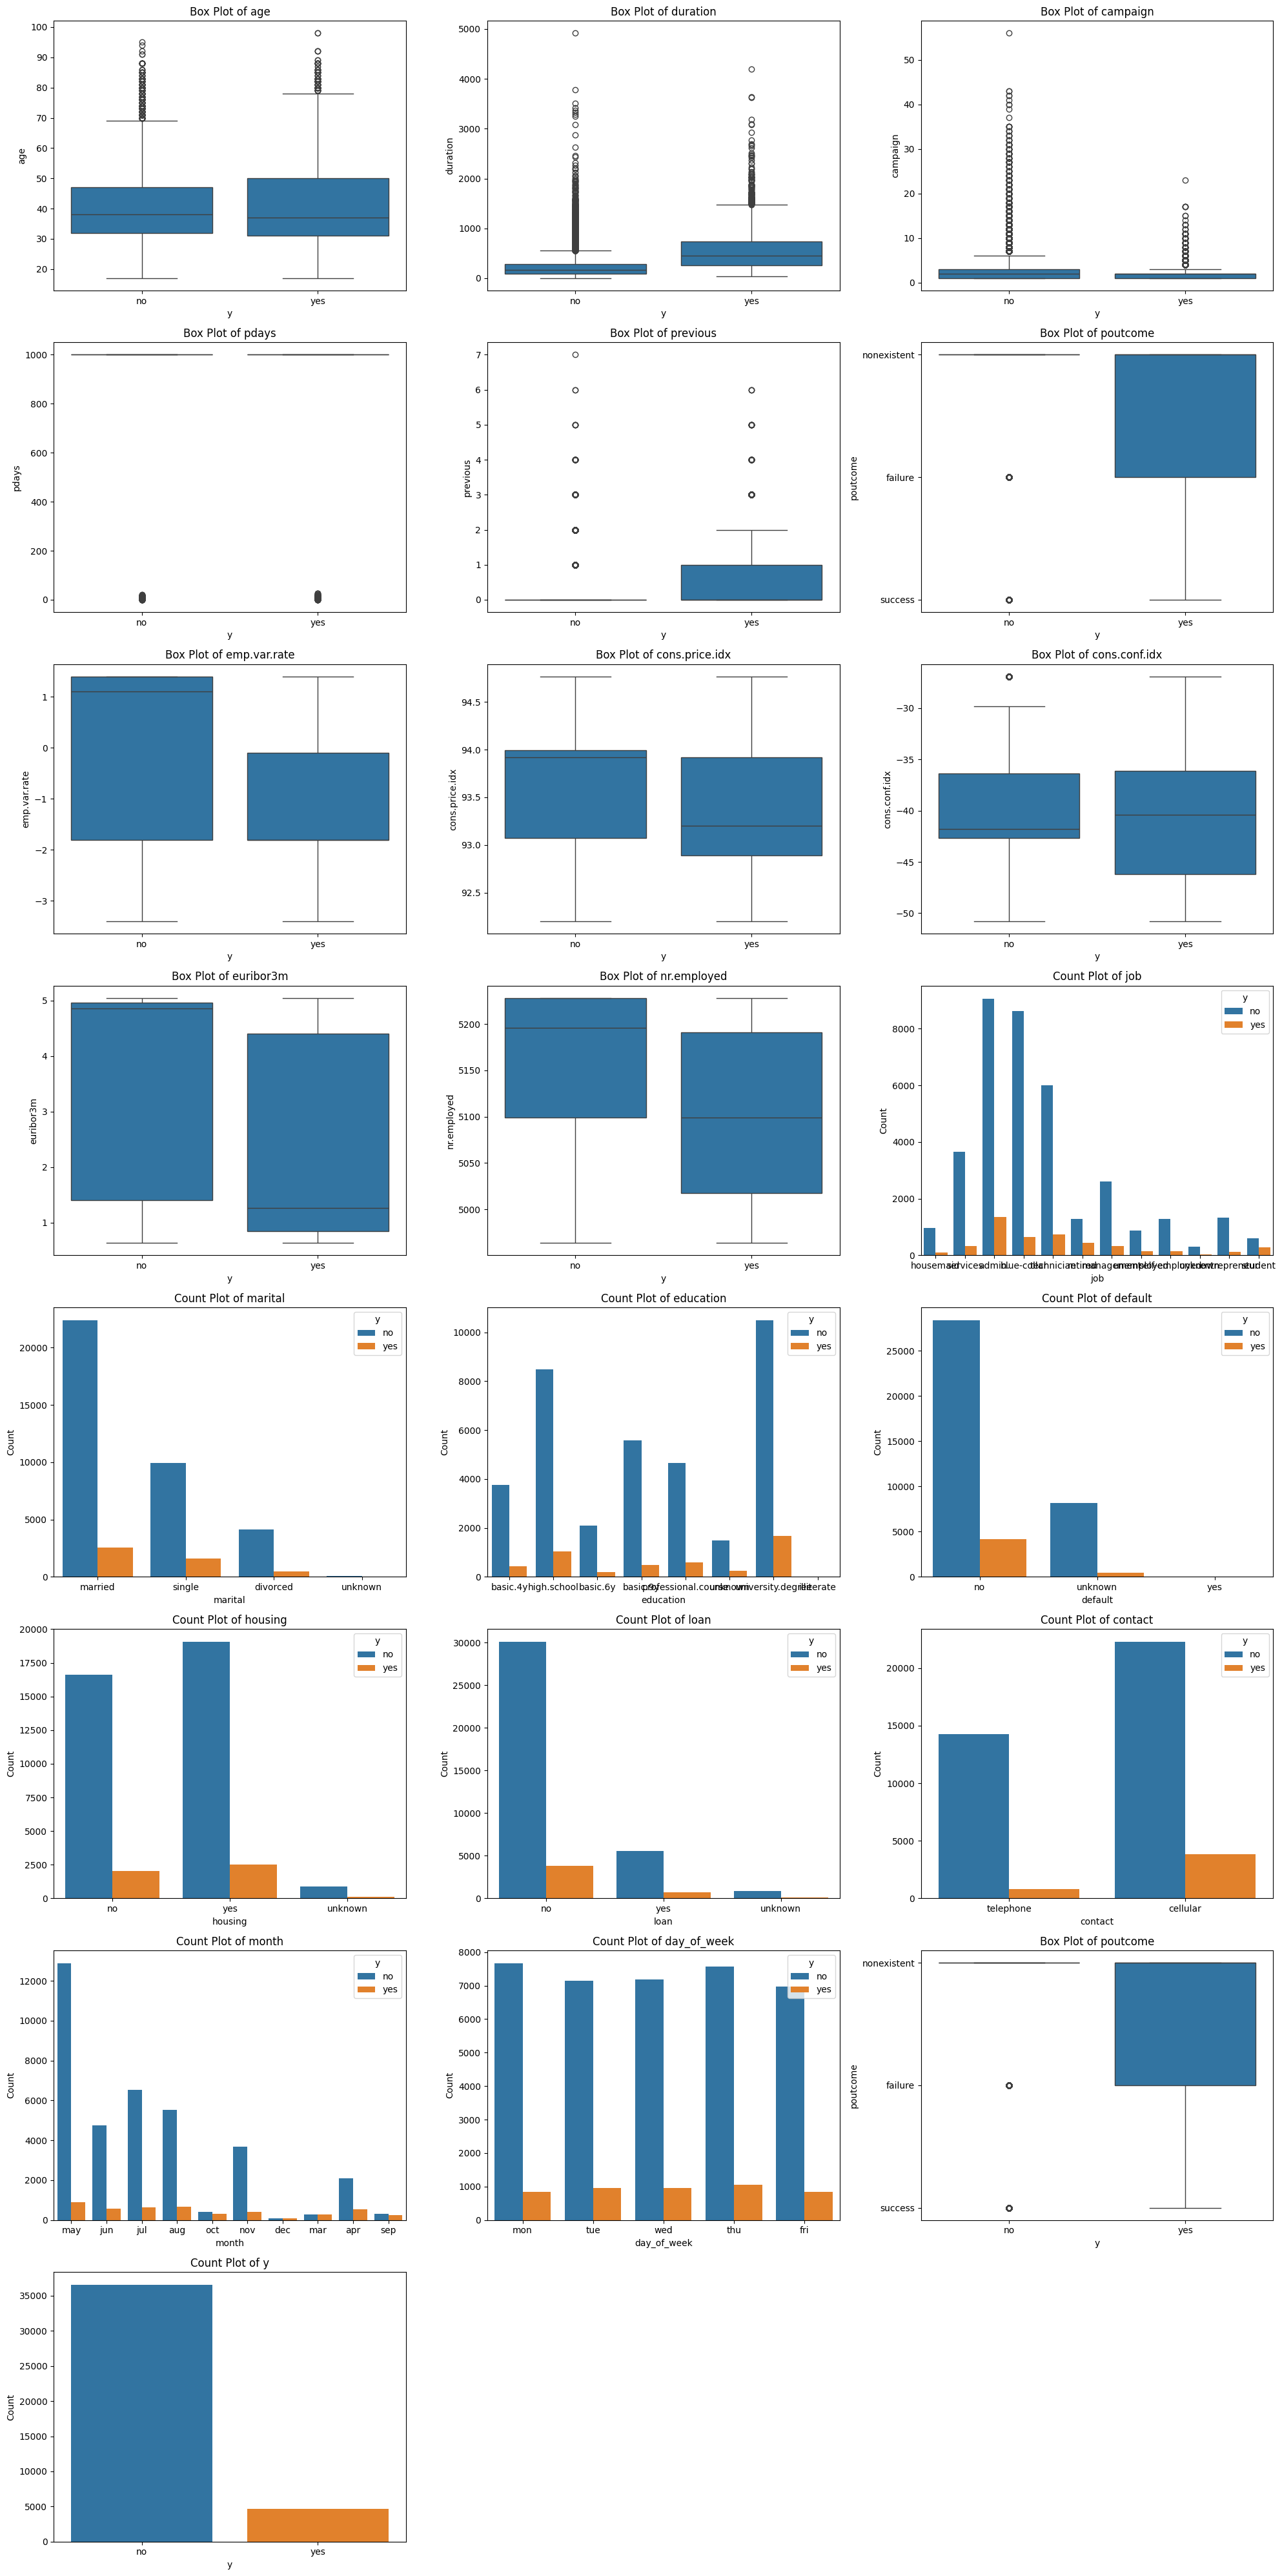

In [27]:
# Part 3: Data exploration and analysis: Explore and analyse the data to gain insights. 

# Create plots using non encoded dataframe
 
# List of numerical and categorical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' ,'nr.employed']

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'day_of_week','poutcome','y']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 4 columns)
n_cols = 3
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.boxplot(x='y', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel('y')
        axes[i].set_ylabel(col)
    else:
        sns.countplot(x=col, hue='y', data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

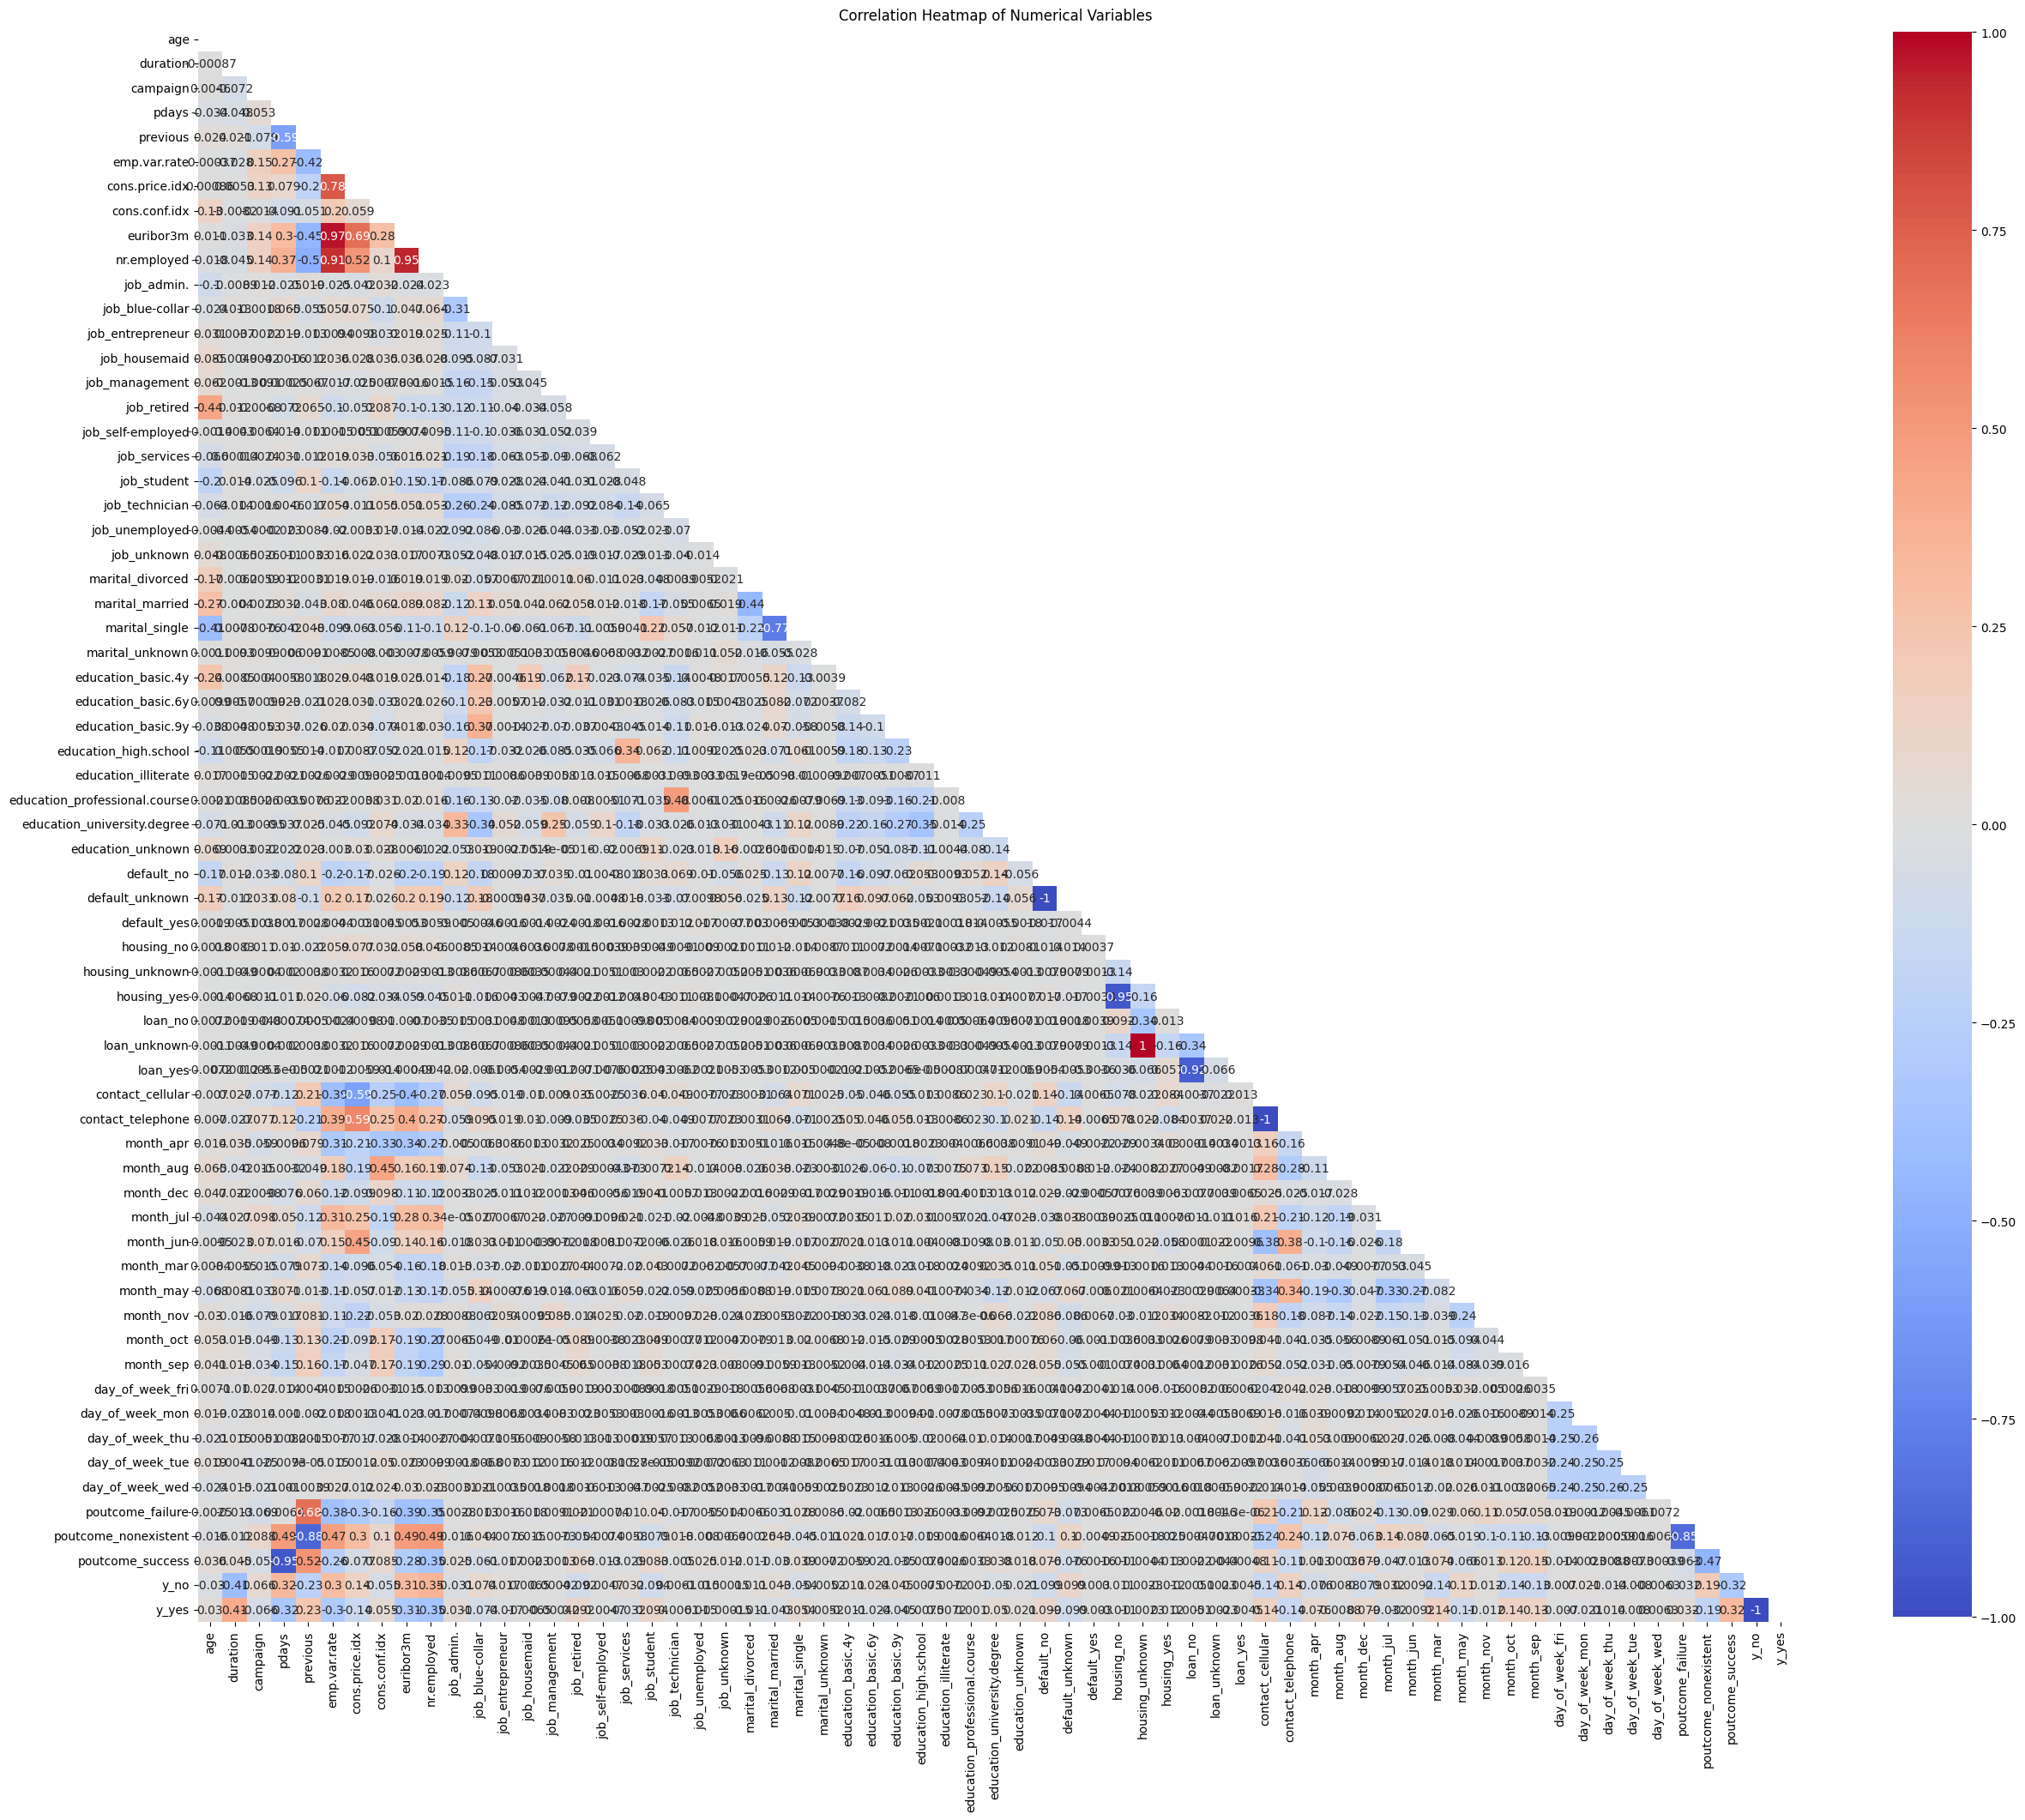

In [28]:
# Part 3: Data exploration and analysis: Explore and analyse the data to gain insights. 

#create heatmap and correlation chart 

# List of shortlisted columns
shortlist_columns = [#outcome variable used for prediction
                    #  'y_yes',
                     #Numerical variables from source file
                    #  'age', 'duration', 'campaign', 'pdays', 'previous'
                    #transformed variable from categories
                    # 'Geography_NSW', 'Geography_QLD', 'Geography_VIC','Gender_Female','Gender_Male',
                    # 'HasCrCard_0','HasCrCard_1','IsActiveMember_0','IsActiveMember_1','Complain_0','Complain_1',
                    # 'Card Type_DIAMOND', 'Card Type_GOLD','Card Type_PLATINUM','Card Type_SILVER'
                     ]


# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})

# Set title and show the plot
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


#Note: the output shows a few hotspots, the next section will focus on finding those highly correlate with Y variable

     Variable 1                     Variable 2  Correlation
2079      y_yes                           y_no    -1.000000
2017      y_yes                       duration     0.405274
2025      y_yes                    nr.employed    -0.354678
2019      y_yes                          pdays    -0.324914
2078      y_yes               poutcome_success     0.316269
2024      y_yes                      euribor3m    -0.307771
2021      y_yes                   emp.var.rate    -0.298334
2020      y_yes                       previous     0.230181
2077      y_yes           poutcome_nonexistent    -0.193507
2060      y_yes              contact_telephone    -0.144773
2059      y_yes               contact_cellular     0.144773
2066      y_yes                      month_mar     0.144014
2069      y_yes                      month_oct     0.137366
2022      y_yes                 cons.price.idx    -0.136211
2070      y_yes                      month_sep     0.126067
2067      y_yes                      mon

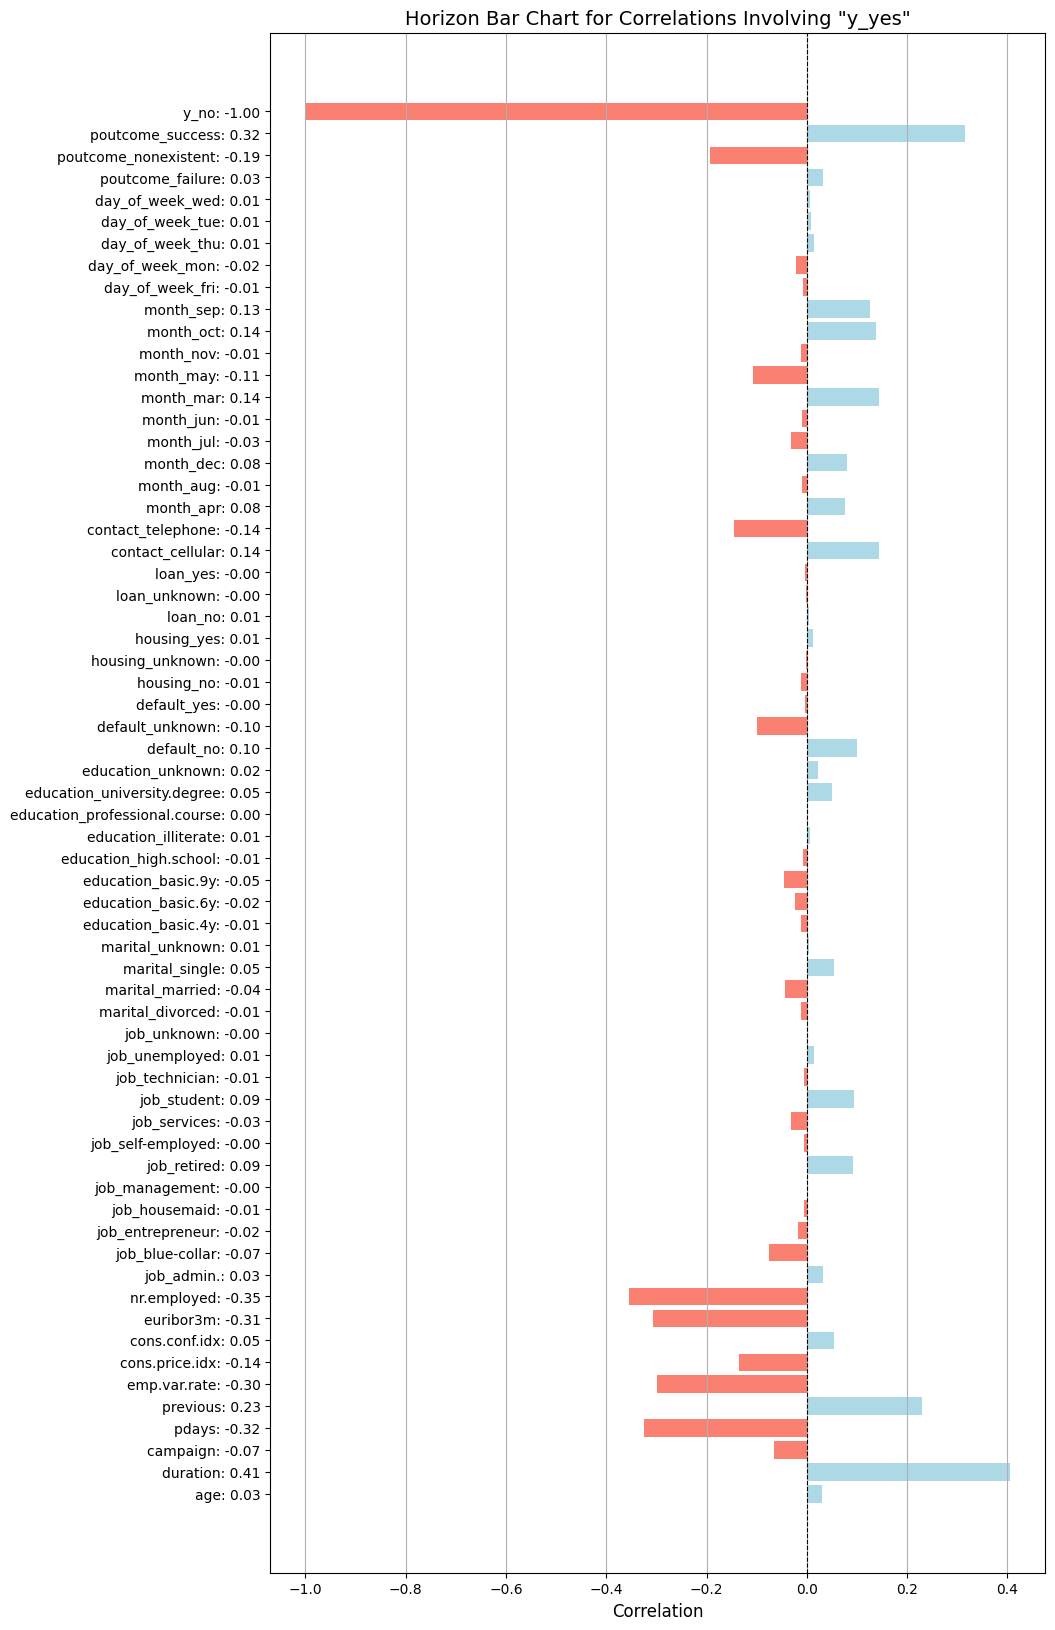

In [29]:
# Part 3: Data exploration and analysis: Explore and analyse the data to gain insights. 

# produce a table with tabular format given the large number of variables in dataframe

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the pairs from the lower triangle, excluding the diagonal
corr_pairs = (
    corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
    .stack()
    .reset_index()
)

# Rename columns for readability
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Sort by absolute correlation values in descending order
sorted_corr_pairs = corr_pairs.reindex(corr_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Filter to only show pairs where either Variable 1 or Variable 2 is "A"
specific_variable = "y_yes"
filtered_pairs = sorted_corr_pairs[
    (sorted_corr_pairs['Variable 1'] == specific_variable) | 
    (sorted_corr_pairs['Variable 2'] == specific_variable)
]

print(filtered_pairs)

#========================================================================================

# Prepare data for horizon chart, sorted by absolute correlation
filtered_pairs = filtered_pairs.reindex(filtered_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Create horizon bar chart
plt.figure(figsize=(10, 20))

for index, row in filtered_pairs.iterrows():
    # Set color based on correlation sign
    color = 'lightblue' if row['Correlation'] > 0 else 'salmon'
    
    # Plot the bars
    plt.barh(index, row['Correlation'], color=color)

# Add labels with reduced font size
plt.yticks(filtered_pairs.index, [f"{row['Variable 2'] if row['Variable 1'] == specific_variable else row['Variable 1']}: {row['Correlation']:.2f}" for _, row in filtered_pairs.iterrows()], fontsize=10)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add vertical line at 0
plt.xlabel('Correlation', fontsize=12)
plt.title(f'Horizon Bar Chart for Correlations Involving "{specific_variable}"', fontsize=14)
plt.grid(axis='x')

# Show plot
plt.show()

In [30]:
# Part 3: Data exploration and analysis: Explore and analyse the data to gain insights. 

# Find pairs with correlation coefficient >= 0.7 for the whole dataset
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the pairs and their R-squared values
for pair in high_corr_pairs:
    var1, var2, corr = pair
    r_squared = corr ** 2
    print(f"Variables: {var1} and {var2} have a correlation of {corr:.2f} and R-squared of {r_squared:.2f}")


#Review of the output for insight generation

#Group 1: Relevant to Predictive variable (or somewhat relevant)
# Variables: poutcome_success and pdays have a correlation of -0.95 and R-squared of 0.90
# Variables: poutcome_nonexistent and poutcome_failure have a correlation of -0.85 and R-squared of 0.73
# Variables: poutcome_nonexistent and previous have a correlation of -0.88 and R-squared of 0.77

#Group 2: Not televant to Predictive variable
# Variables: cons.price.idx and emp.var.rate have a correlation of 0.78 and R-squared of 0.60
# Variables: euribor3m and emp.var.rate have a correlation of 0.97 and R-squared of 0.95
# Variables: nr.employed and emp.var.rate have a correlation of 0.91 and R-squared of 0.82
# Variables: nr.employed and euribor3m have a correlation of 0.95 and R-squared of 0.89
# Variables: marital_single and marital_married have a correlation of -0.77 and R-squared of 0.60

#Group 3: Self fullfilling correlations, eg, variable is binary in nature
# Variables: y_yes and y_no have a correlation of -1.00 and R-squared of 1.00
# Variables: default_unknown and default_no have a correlation of -1.00 and R-squared of 1.00
# Variables: loan_unknown and housing_unknown have a correlation of 1.00 and R-squared of 1.00
# Variables: contact_telephone and contact_cellular have a correlation of -1.00 and R-squared of 1.00
# Variables: housing_yes and housing_no have a correlation of -0.95 and R-squared of 0.91
# Variables: loan_yes and loan_no have a correlation of -0.92 and R-squared of 0.84



Variables: cons.price.idx and emp.var.rate have a correlation of 0.78 and R-squared of 0.60
Variables: euribor3m and emp.var.rate have a correlation of 0.97 and R-squared of 0.95
Variables: nr.employed and emp.var.rate have a correlation of 0.91 and R-squared of 0.82
Variables: nr.employed and euribor3m have a correlation of 0.95 and R-squared of 0.89
Variables: marital_single and marital_married have a correlation of -0.77 and R-squared of 0.60
Variables: default_unknown and default_no have a correlation of -1.00 and R-squared of 1.00
Variables: housing_yes and housing_no have a correlation of -0.95 and R-squared of 0.91
Variables: loan_unknown and housing_unknown have a correlation of 1.00 and R-squared of 1.00
Variables: loan_yes and loan_no have a correlation of -0.92 and R-squared of 0.84
Variables: contact_telephone and contact_cellular have a correlation of -1.00 and R-squared of 1.00
Variables: poutcome_nonexistent and previous have a correlation of -0.88 and R-squared of 0.77


In [31]:
# Part 3: Data exploration and analysis: Explore and analyse the data to gain insights. 

# Round #2 of feature engineering to prep for modelling layer

# Removing the following variables due to low correlation with target variable and data privacy

# Drop some encoded variables that are binary in nature
df_encoded.drop(columns=['duration', 'y_no',
                         'marital_divorced','marital_married','marital_single','marital_unknown'], inplace=True)



In [32]:
# Set pandas options to display all columns
pd.set_option('display.max_rows', None)

print(df_encoded.head().T)

                                      0         1         2         3         4
age                              56.000    57.000    37.000    40.000    56.000
campaign                          1.000     1.000     1.000     1.000     1.000
pdays                           999.000   999.000   999.000   999.000   999.000
previous                          0.000     0.000     0.000     0.000     0.000
emp.var.rate                      1.100     1.100     1.100     1.100     1.100
cons.price.idx                   93.994    93.994    93.994    93.994    93.994
cons.conf.idx                   -36.400   -36.400   -36.400   -36.400   -36.400
euribor3m                         4.857     4.857     4.857     4.857     4.857
nr.employed                    5191.000  5191.000  5191.000  5191.000  5191.000
job_admin.                        0.000     0.000     0.000     1.000     0.000
job_blue-collar                   0.000     0.000     0.000     0.000     0.000
job_entrepreneur                  0.000 

In [33]:
# Part 4: Model building and evaluation: Build and evaluate different predictive models to solve the problem. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target variable (y)

X = df_encoded.drop(columns=['y_yes'])
y = df_encoded['y_yes']


# 4. Data Splitting

# 4.1. Split the Data into Training and Testing Sets
# We split the data into training and testing sets to evaluate the performance of our model.

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
# Standardization rescales features to have a mean of 0 and a standard deviation of 1,
# which is essential for models sensitive to the scale of input data (e.g., Logistic Regression).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaling parameters


In [34]:
# Part 4: Model building and evaluation: Build and evaluate different predictive models to solve the problem. 

# Note: logistic regression is not part of the assignment
# Logistic Regression
# Create an instance of the Logistic Regression model
log_reg = LogisticRegression()
# Fit the model to the scaled training data and corresponding labels
log_reg.fit(X_train_scaled, y_train)
# Predict the labels for the scaled test data
y_pred_logreg = log_reg.predict(X_test_scaled)

# Decision Tree Classifier
# Create an instance of the Decision Tree Classifier with a fixed random state for reproducibility
tree_clf = DecisionTreeClassifier(random_state=42)
# Fit the model to the original training data
tree_clf.fit(X_train, y_train)
# Predict the labels for the test data
y_pred_tree = tree_clf.predict(X_test)

# Random Forest Classifier
# Create an instance of the Random Forest Classifier with a fixed random state for reproducibility
rf_clf = RandomForestClassifier(random_state=42)
# Fit the model to the original training data
rf_clf.fit(X_train, y_train)
# Predict the labels for the test data
y_pred_rf = rf_clf.predict(X_test)

# Gradient Boosting Classifier
# Create an instance of the Gradient Boosting Classifier with a fixed random state for reproducibility
gb_clf = GradientBoostingClassifier(random_state=42)
# Fit the model to the original training data
gb_clf.fit(X_train, y_train)
# Predict the labels for the test data
y_pred_gb = gb_clf.predict(X_test)

In [35]:
# Part 4: Model building and evaluation: Build and evaluate different predictive models to solve the problem. 

# Part 4: Evaluate Models

# Model Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    """
    Evaluates and prints the performance metrics for a given model.
    
    Parameters:
    - y_test: Actual labels from the test set
    - y_pred: Predicted labels from the model
    - model_name: Name of the model being evaluated (for display purposes)
    """
    print(f"---{model_name}---")  # Print the model name for clarity
    print("Accuracy:", accuracy_score(y_test, y_pred))  # Calculate and print accuracy
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Print confusion matrix
    print("Classification Report:\n", classification_report(y_test, y_pred))  # Print detailed metrics

# Evaluate models
# Call the evaluate_model function for each model with their respective predictions
# evaluate_model(y_test, y_pred_logreg, "Logistic Regression")  # Evaluate Logistic Regression model
evaluate_model(y_test, y_pred_tree, "Decision Tree")          # Evaluate Decision Tree model
evaluate_model(y_test, y_pred_rf, "Random Forest")            # Evaluate Random Forest model
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")        # Evaluate Gradient Boosting model


---Decision Tree---
Accuracy: 0.8409808205875212
Confusion Matrix:
 [[9928 1040]
 [ 925  464]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     10968
           1       0.31      0.33      0.32      1389

    accuracy                           0.84     12357
   macro avg       0.61      0.62      0.62     12357
weighted avg       0.85      0.84      0.84     12357

---Random Forest---
Accuracy: 0.8908311078740795
Confusion Matrix:
 [[10601   367]
 [  982   407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10968
           1       0.53      0.29      0.38      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357

---Gradient Boosting---
Accuracy: 0.9014323865015781
Confusion Matrix:
 [[10786   182]
 [ 1036   353]]
C

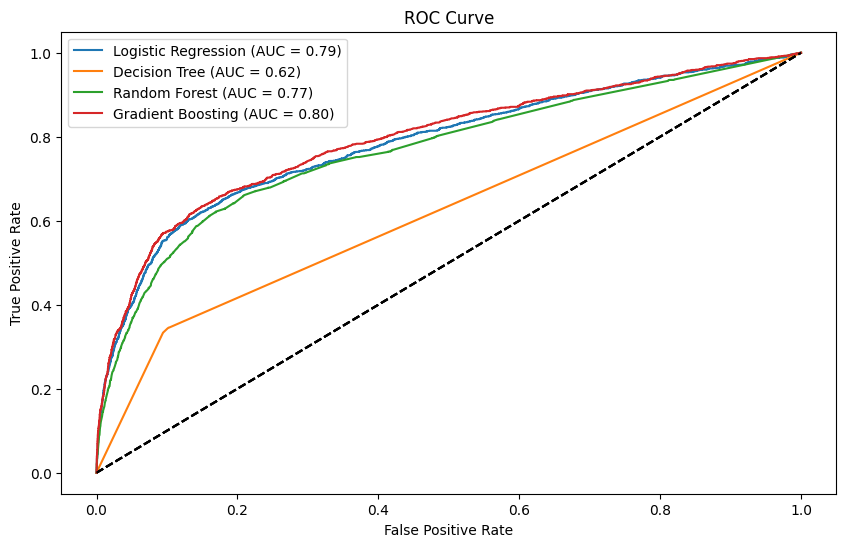

In [36]:
# Part 4: Model building and evaluation: Build and evaluate different predictive models to solve the problem. 


# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, model_name):
    """
    Plots the ROC curve for a specified model.
    
    Parameters:
    - y_test: Actual labels from the test set
    - y_pred_prob: Predicted probabilities from the model
    - model_name: Name of the model being evaluated (for display purposes)
    """
    # Compute the false positive rate (fpr) and true positive rate (tpr)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')  # Plot model's ROC curve
    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line representing random chance
    plt.xlabel('False Positive Rate')  # Label for x-axis
    plt.ylabel('True Positive Rate')  # Label for y-axis
    plt.title('ROC Curve')  # Title of the plot
    plt.legend()  # Show legend

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Call the plot_roc_curve function for each model using predicted probabilities
plot_roc_curve(y_test, log_reg.predict_proba(X_test_scaled), 'Logistic Regression')  # ROC for Logistic Regression
plot_roc_curve(y_test, tree_clf.predict_proba(X_test), 'Decision Tree')              # ROC for Decision Tree
plot_roc_curve(y_test, rf_clf.predict_proba(X_test), 'Random Forest')                # ROC for Random Forest
plot_roc_curve(y_test, gb_clf.predict_proba(X_test), 'Gradient Boosting')            # ROC for Gradient Boosting

# Display the ROC curve for all models
plt.show()

/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_33508/2258754963.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(value, index, f'{coef_importance_sorted[index]:.2f}', va='center', ha='right', color='black')


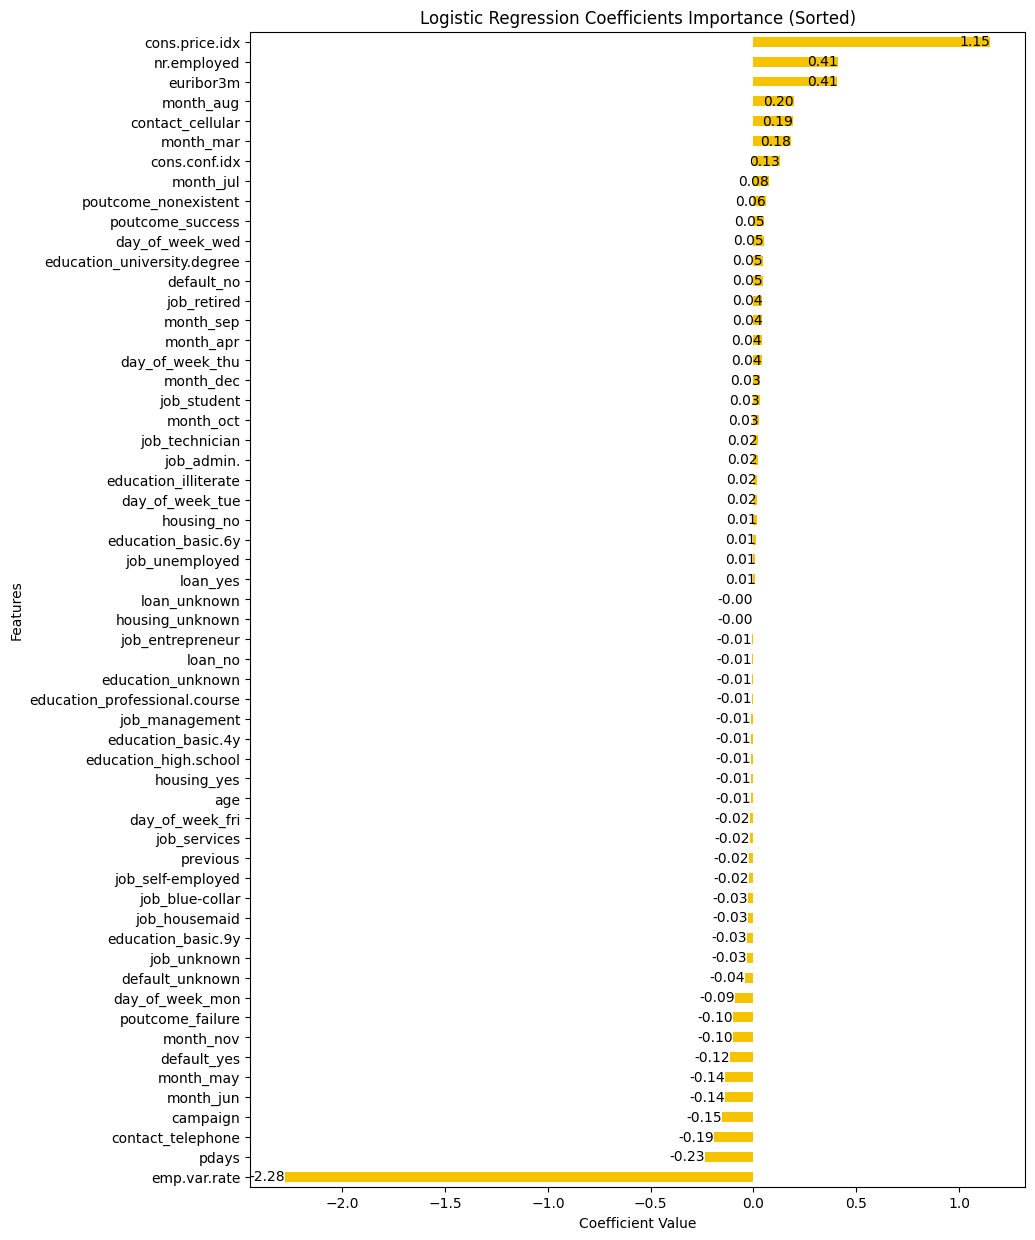

In [37]:
# Part 4: Model building and evaluation: Build and evaluate different predictive models to solve the problem. 

# Plot Logistic Regression Coefficients (Sorted by Importance)
# Extract the coefficients from the fitted logistic regression model
coef_importance = pd.Series(log_reg.coef_[0], index=X.columns)  # Create a Series with feature names as index
# Sort the coefficients by their absolute values to identify important features
coef_importance_sorted = coef_importance.sort_values(ascending=False)  # Sort by importance

# Create a horizontal bar plot for visualizing coefficient importance
plt.figure(figsize=(10, 15))  # Set the size of the plot
coef_importance_sorted.plot(kind='barh', color='#F5C300')  # Create a horizontal bar plot with a specified color

# Annotate each bar with the actual coefficient value
for index, value in enumerate(coef_importance_sorted):
    # Display the coefficient value on the right side of each bar
    plt.text(value, index, f'{coef_importance_sorted[index]:.2f}', va='center', ha='right', color='black')

# Set the title and labels for the plot
plt.title('Logistic Regression Coefficients Importance (Sorted)')  # Title of the plot
plt.xlabel('Coefficient Value')  # Label for x-axis
plt.ylabel('Features')  # Label for y-axis
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()  # Display the plot

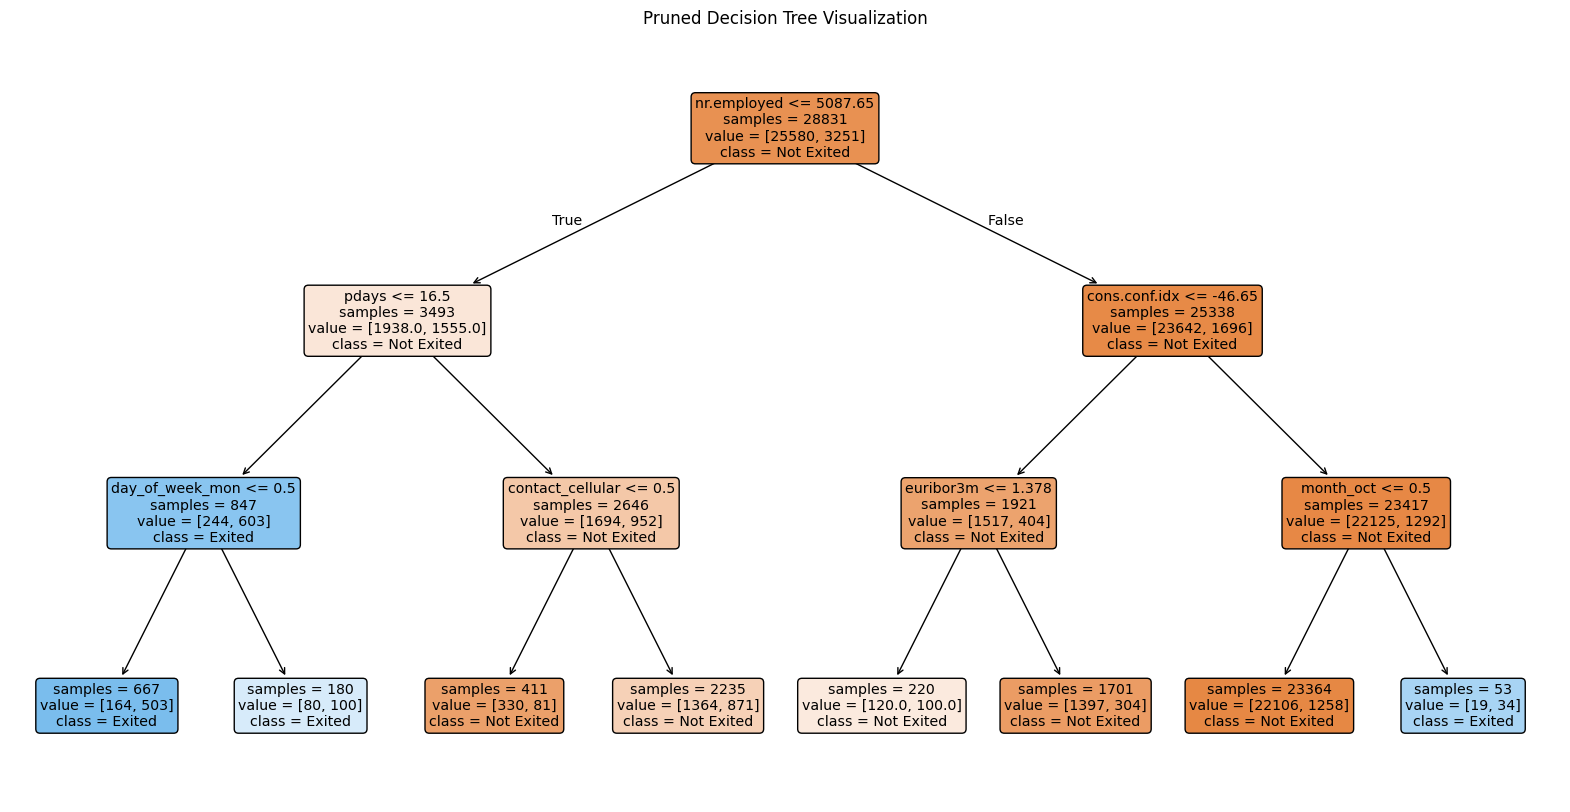

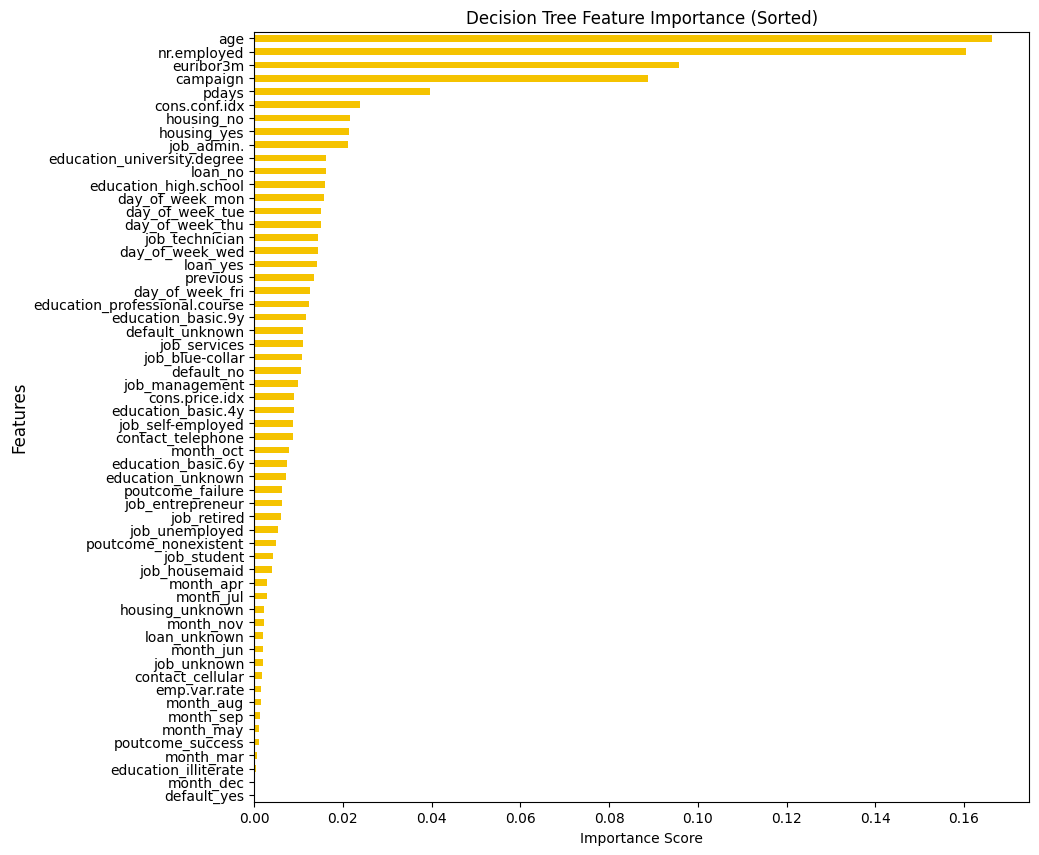


Decision Tree Feature Importance (Sorted):
age                              0.166370
nr.employed                      0.160438
euribor3m                        0.095734
campaign                         0.088796
pdays                            0.039544
cons.conf.idx                    0.023910
housing_no                       0.021573
housing_yes                      0.021321
job_admin.                       0.021184
education_university.degree      0.016126
loan_no                          0.016113
education_high.school            0.016067
day_of_week_mon                  0.015660
day_of_week_tue                  0.015170
day_of_week_thu                  0.015108
job_technician                   0.014411
day_of_week_wed                  0.014377
loan_yes                         0.014081
previous                         0.013527
day_of_week_fri                  0.012537
education_professional.course    0.012316
education_basic.9y               0.011577
default_unknown                 

In [38]:
# Part 4: Model building and evaluation: Build and evaluate different predictive models to solve the problem. 

# understanding key drivers, using decision tree

# Set a max_depth to prune the tree and avoid overfitting
# You can adjust the max_depth based on your preferences
pruned_tree_clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limit the tree depth
pruned_tree_clf.fit(X_train, y_train)


# Plot the pruned Decision Tree
plt.figure(figsize=(20,10))

plot_tree(pruned_tree_clf, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          class_names=['Not Exited', 'Exited'],
          proportion=False, 
          impurity=False,
          node_ids=False
          )

plt.title("Pruned Decision Tree Visualization")
plt.show()


# Feature Importance from Decision Tree
tree_importance = pd.Series(tree_clf.feature_importances_, index=X.columns)
tree_importance_sorted = tree_importance.sort_values(ascending=False)

# Plot Decision Tree Feature Importance
plt.figure(figsize=(10,10))
tree_importance_sorted.plot(kind='barh', color='#F5C300')
plt.title('Decision Tree Feature Importance (Sorted)')
plt.xlabel('Importance Score')
plt.ylabel('Features',fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()


# Print the feature importance
print("\nDecision Tree Feature Importance (Sorted):")
print(tree_importance_sorted)



In [39]:
# Part 4: Model building and evaluation: Build and evaluate different predictive models to solve the problem. 

#Perform Hypertunning for gradient boosting classifer model due to predictive power compared to other comparative model types.

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform


# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
# This grid contains ranges of hyperparameters to sample from during the tuning process
param_distributions = {
    'n_estimators': randint(50, 300),  # Number of boosting stages to be run
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinking to prevent overfitting
    'max_depth': randint(1, 10),  # Maximum depth of the individual estimators
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
}

# Set up the RandomizedSearchCV
# This will perform the hyperparameter search with cross-validation
random_search = RandomizedSearchCV(
    gb_classifier,
    param_distributions,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',  # Metric to evaluate the model
    cv=3,  # Number of cross-validation folds
    verbose=1,  # Verbosity level
    n_jobs=-1,  # Use all available cores for parallel processing
    random_state=42  # Ensure reproducibility of results
)

# Fit the model to the training data using the randomized search
random_search.fit(X_train, y_train)

# Output the best hyperparameters found during the search
print("Best parameters found: ", random_search.best_params_)

# Make predictions on the test set using the best model
y_pred = random_search.predict(X_test)

# Evaluate the model's performance
print("Accuracy: ", accuracy_score(y_test, y_pred))  # Print the accuracy of the model
print(classification_report(y_test, y_pred))  # Print a detailed classification report


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'learning_rate': np.float64(0.19355586841671385), 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 113}
Accuracy:  0.90102775754633
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10968
           1       0.64      0.27      0.38      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



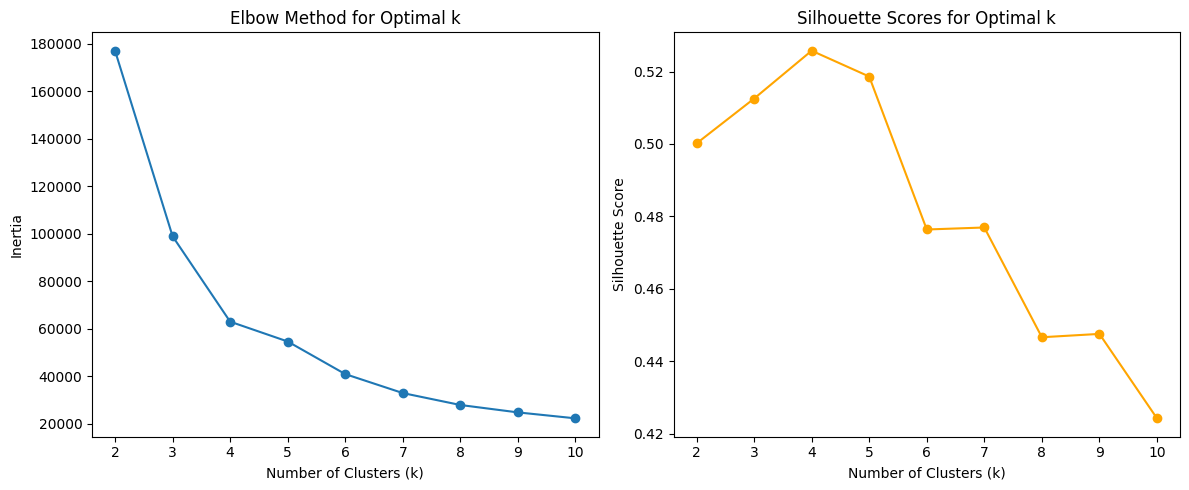

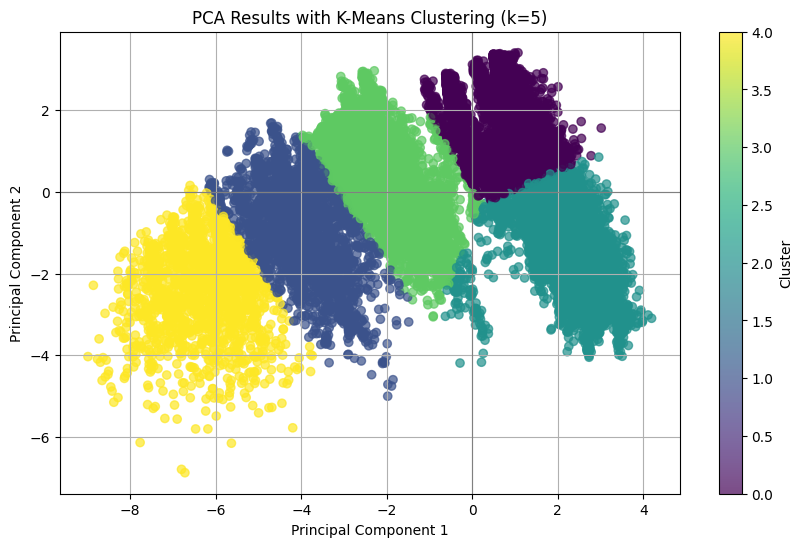

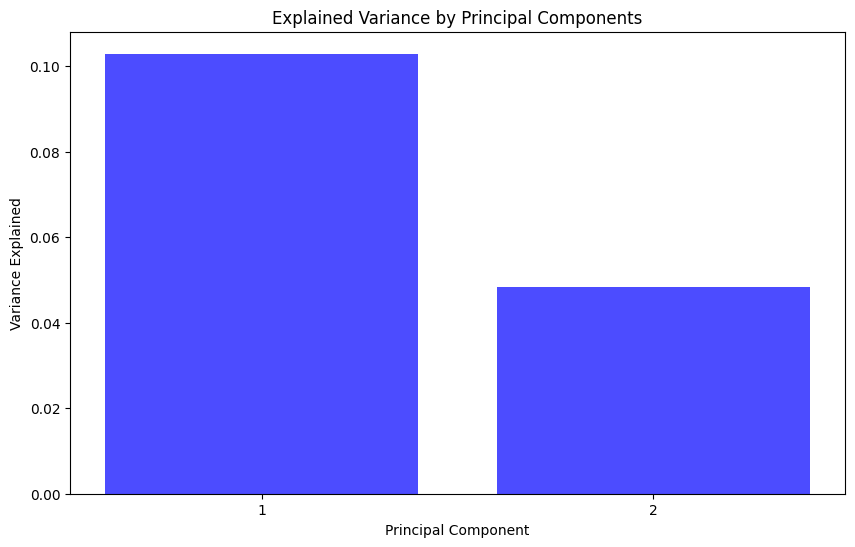

        PC1       PC2  Cluster
0  2.029974 -1.947463        2
1  2.477710 -2.494851        2
2  1.689736 -0.857264        2
3  1.861861 -1.161441        2
4  1.847721 -1.334642        2


In [40]:
#=============================================================================================================================
# Part 5: Adding in new part for PCA analysis and clustering to better understand the drivers for predictive variable
#=============================================================================================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Step 1: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 3: Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Trying from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Step 4: Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)

# Silhouette Score plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)

plt.tight_layout()
plt.show()

# Optional: Perform KMeans with the optimal number of clusters (based on elbow method)
optimal_k = 5  # Replace this with your chosen optimal k from the analysis, 5 clusters seems to be a good fit
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Create a DataFrame with PCA results and cluster assignments
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters
df_encoded['Cluster'] = clusters

# Step 5: Visualize PCA results with clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.title(f'PCA Results with K-Means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='grey', lw=0.8)
plt.axvline(0, color='grey', lw=0.8)
plt.grid()
plt.colorbar(scatter, label='Cluster')
plt.show()

# Step 6: Explained Variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

# Display the PCA DataFrame with cluster assignments
print(pca_df.head())

/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_33508/2065389959.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_encoded, palette='viridis')
/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_33508/2065389959.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_encoded, palette='viridis')
/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_33508/2065389959.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_encoded,

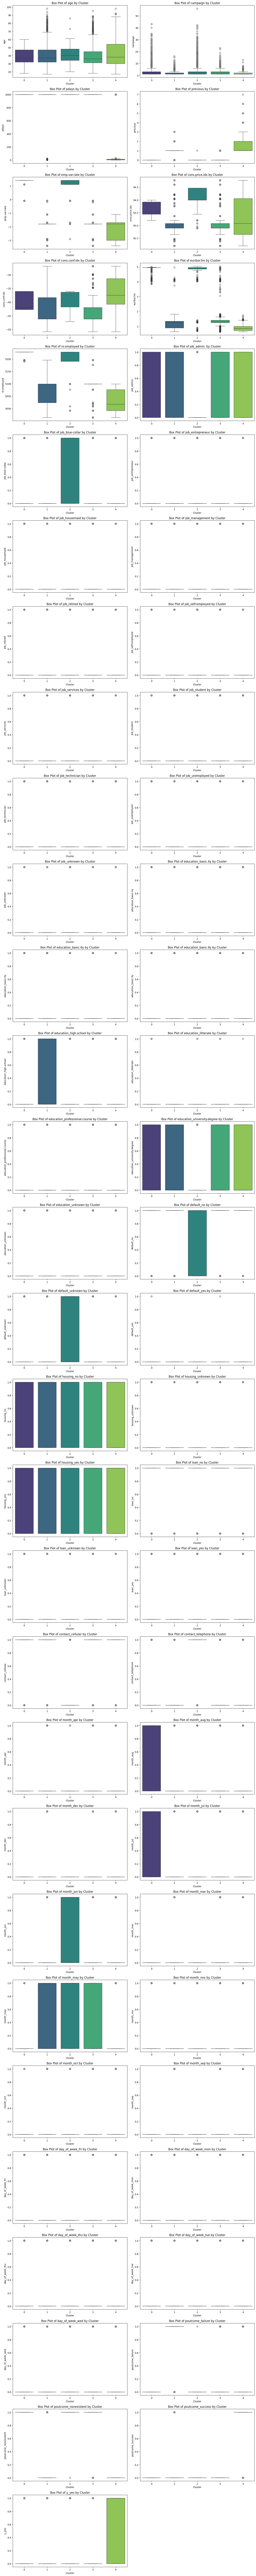

<Figure size 1500x800 with 0 Axes>

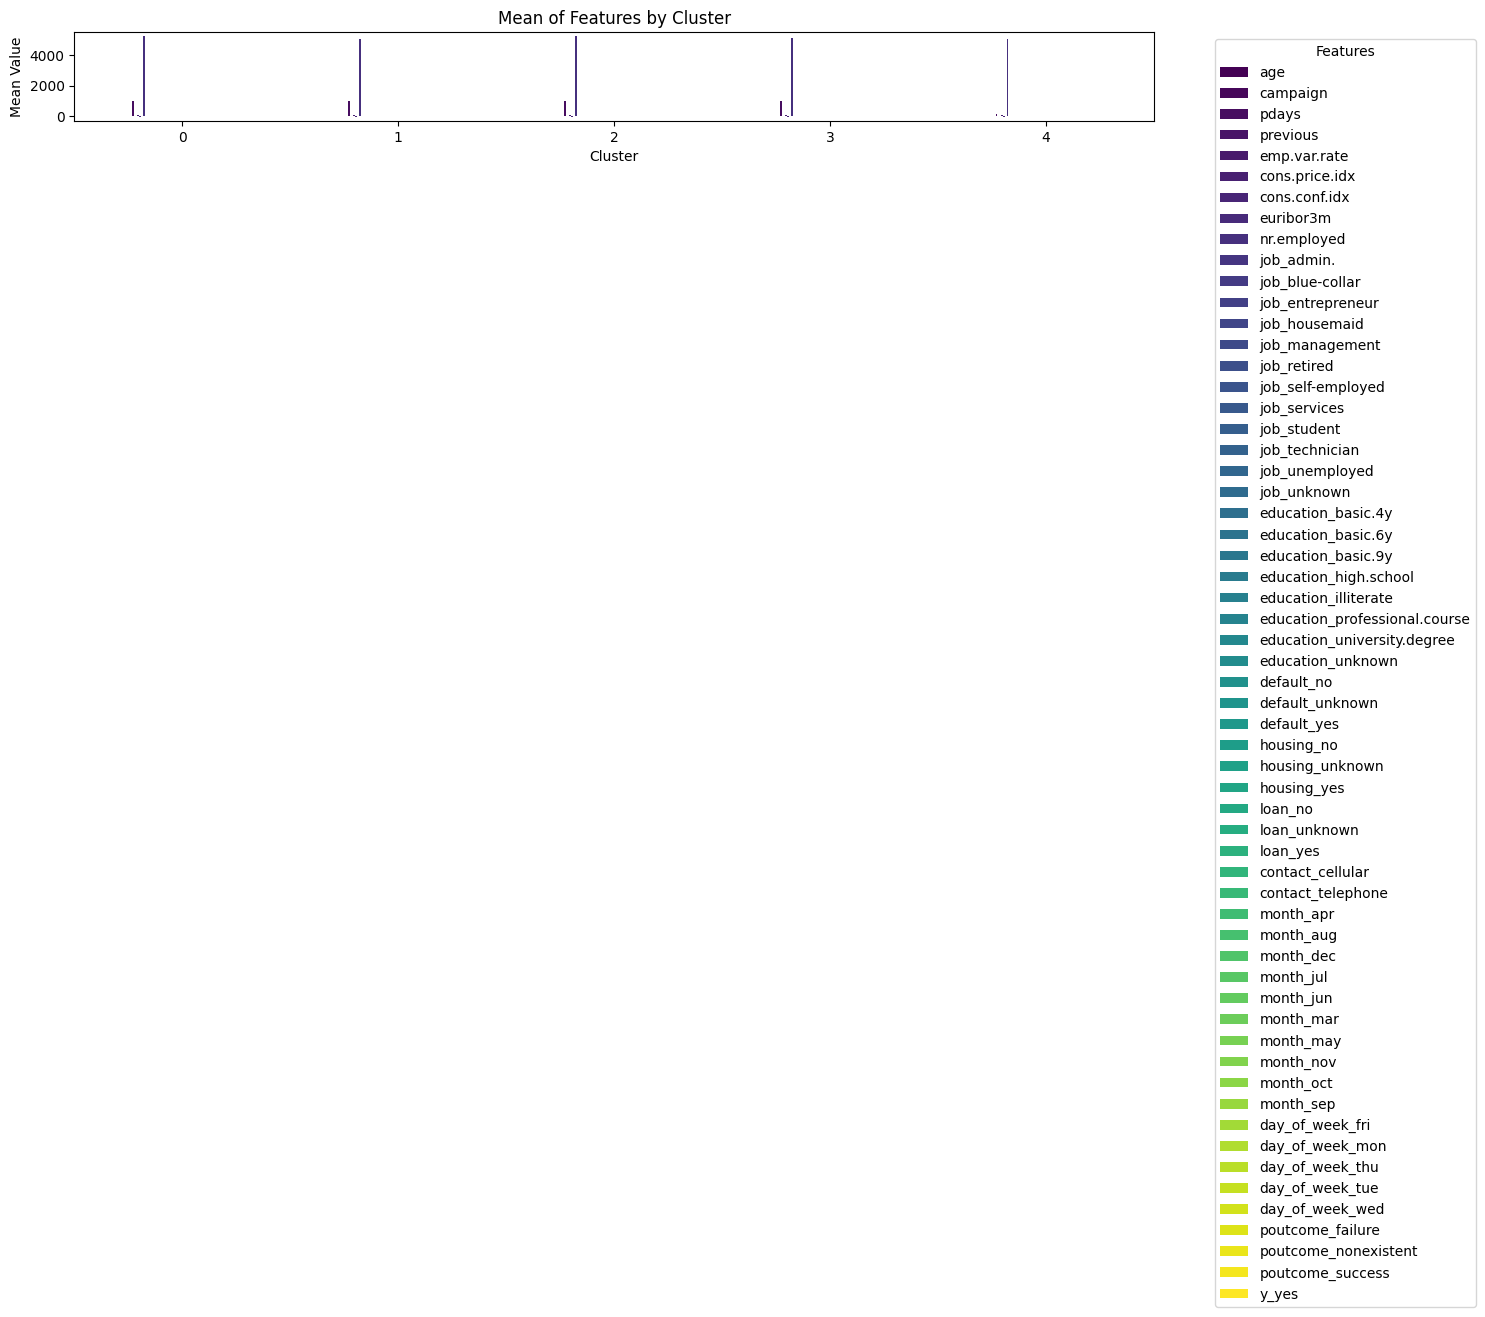

In [41]:
#=============================================================================================================================
# Part 5: Adding in new part for PCA analysis and clustering to better understand the drivers for predictive variable
#=============================================================================================================================
# compare clusters using encoded features

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Generate summary statistics grouped by 'Cluster'
summary_stats = df_encoded.groupby('Cluster').describe()

# Step 2: Visualize with Box Plots for each feature
features = df_encoded.columns[:-1]  # Exclude the 'Cluster' column
num_features = len(features)
num_cols = 2  # Define the number of columns for the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=df_encoded, palette='viridis')
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Step 3: Visualize Mean of Each Feature by Cluster using Bar Plots
mean_values = df_encoded.groupby('Cluster').mean()

plt.figure(figsize=(15, 8))
mean_values.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title('Mean of Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


         Count   Mean (%)   Std Dev  Min  Max
Cluster                                      
0        12459   5.650534  0.230904    0    1
1         3681  18.283075  0.386580    0    1
2        14497   3.766296  0.190386    0    1
3         8878  18.652850  0.389555    0    1
4         1673  63.419008  0.481801    0    1


/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_33508/1923095261.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_y_yes.index, y='Mean (%)', data=summary_y_yes, palette='viridis')


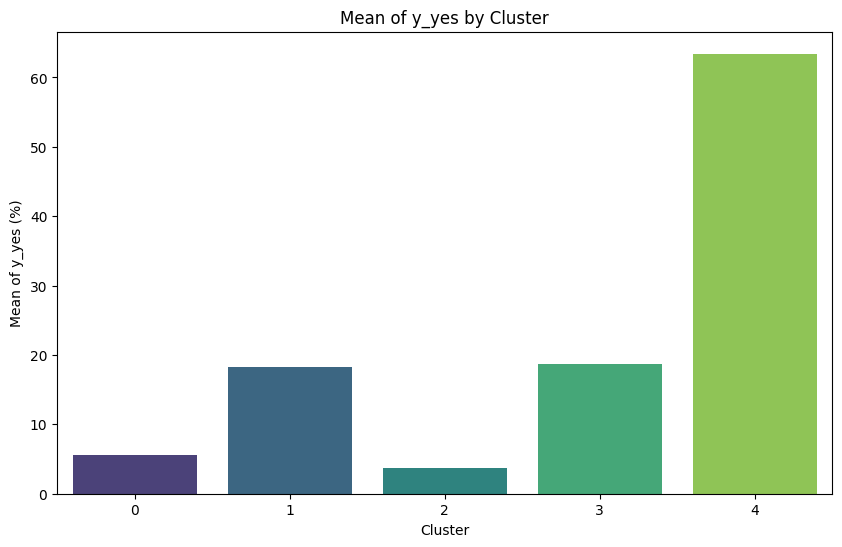

/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_33508/1923095261.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='y_yes', data=df_encoded, palette='viridis')


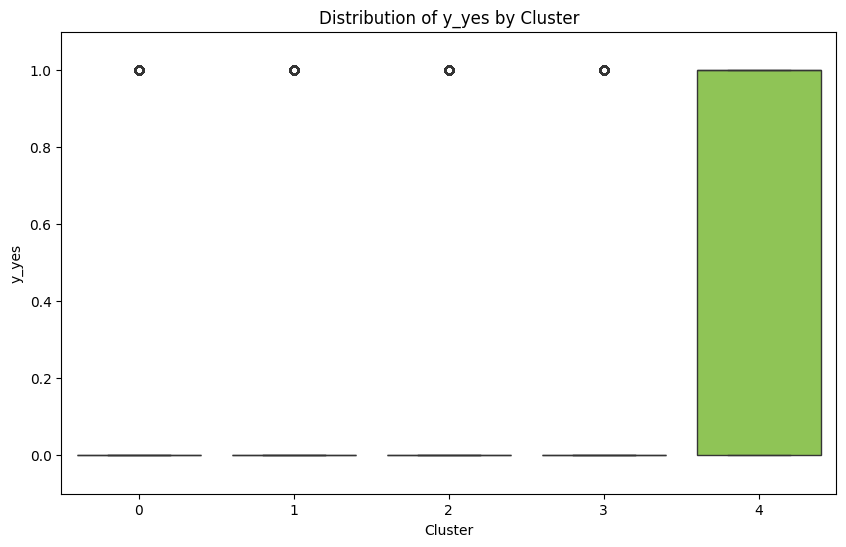

In [42]:
#=============================================================================================================================
# Part 5: Adding in new part for PCA analysis and clustering to better understand the drivers for predictive variable
#=============================================================================================================================

# Understanding of clusters in relation to outcome variable

# Step 1: Summary statistics of y_yes grouped by Cluster
summary_y_yes = df_encoded.groupby('Cluster')['y_yes'].agg(['count', 'mean', 'std', 'min', 'max'])
summary_y_yes['mean'] = summary_y_yes['mean'] * 100  # Convert mean to percentage
summary_y_yes.columns = ['Count', 'Mean (%)', 'Std Dev', 'Min', 'Max']  # Rename columns
print(summary_y_yes)

# Step 2: Visualizing the relationship between Clusters and y_yes

# Bar plot for the mean of y_yes by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_y_yes.index, y='Mean (%)', data=summary_y_yes, palette='viridis')
plt.title('Mean of y_yes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean of y_yes (%)')
plt.xticks(rotation=0)
plt.show()

# Box plot to visualize the distribution of y_yes across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='y_yes', data=df_encoded, palette='viridis')
plt.title('Distribution of y_yes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('y_yes')
plt.ylim(-0.1, 1.1)  # Limit y-axis for better visibility
plt.show()